In [38]:
import numpy as np
import pandas as pd


df = pd.read_csv("./q1/dataset.csv")

# Convert the 'date' column to datetime format
# df['date'] = pd.to_datetime(df['date'], format='%m/%d/%Y')

# # Set the 'date' column as the index
# df.set_index('date', inplace=True)


train = df.iloc[:355,].copy()
train['count'] = train['count'].astype(int)

test = df.iloc[355:,].copy()
test.drop("count", axis=1, inplace=True)

train

,date,count
0,1/1/1988,35
1,1/2/1988,32
2,1/3/1988,30
3,1/4/1988,31
4,1/5/1988,44
...,...,...
350,12/17/1988,39
351,12/18/1988,40
352,12/19/1988,42
353,12/20/1988,42


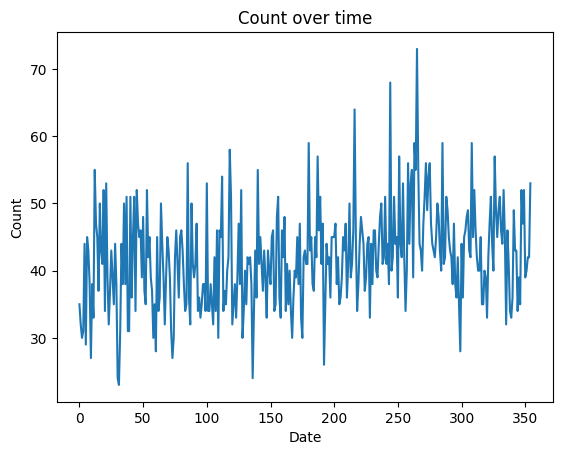

In [39]:
import matplotlib.pyplot as plt
import pandas as pd




# Create a line plot
plt.plot(train.index, train['count'])
plt.xlabel('Date')
plt.ylabel('Count')
plt.title('Count over time')
plt.show()

In [40]:
# # Aggregate the counts every four days
# counts_agg = train.resample('4D').sum()

# print(counts_agg)
# # Create a bar chart
# plt.bar(counts_agg.index, counts_agg['count'])
# plt.xlabel('Date')
# plt.ylabel('Count')
# plt.title('Count every 4 days')
# plt.show()

In [41]:
from prophet import Prophet

model = Prophet(growth="linear")

print(train.columns)

train.columns = ["ds", "y"]
test.columns = ["ds"]

model.fit(train)

res = model.predict(test)[["yhat"]]

res.columns = ["count"]
res.to_csv("q1/output.csv", index=False)


10:48:49 - cmdstanpy - INFO - Chain [1] start processing
10:48:49 - cmdstanpy - INFO - Chain [1] done processing


Index(['date', 'count'], dtype='object')
